In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


**Reading the data**

In [2]:
data = pd.read_csv("companies.csv")
data.head()


,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,05-09-2010,18-09-2013,5.0,17.0,initial-importer,25-05-2007 06:51,13-04-2013 03:29,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,31-05-2007 21:11,23-05-2008 23:23,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,01-02-2003,23-09-2011,4.0,12.0,initial-importer,06-08-2007 23:52,04-11-2013 02:09,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 16:51,06-09-2008 14:19,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,24-08-2008 17:10,06-09-2008 14:19,NaN,NaN,NaN


**printing the shape and description of data**

In [3]:
data.shape
data.describe()


,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333330


**Checking for null values**

In [4]:
data.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

**Printing percentage of null values**

In [5]:
percentage = []
for i in data:
    per= (data[i].isnull().sum()/data.shape[0]) * 100
    percentage.append({"Variable":i,"Percentage":per})

per_null = pd.DataFrame(percentage)
print(per_null)


               Variable  Percentage
0                    id    0.000000
1          Unnamed: 0.1    0.000000
2           entity_type    0.000000
3             entity_id    0.000000
4             parent_id  100.000000
5                  name    0.011193
6       normalized_name    0.013228
7             permalink    0.000000
8         category_code   37.326828
9                status    0.000000
10           founded_at   53.586564
11            closed_at   98.667026
12               domain   35.617874
13         homepage_url   35.617874
14     twitter_username   58.997828
15             logo_url   43.979486
16           logo_width   43.979486
17          logo_height   43.979486
18    short_description   96.371971
19          description   53.168865
20             overview   35.401139
21             tag_list   58.559778
22         country_code   55.233448
23           state_code   74.102151
24                 city   57.319400
25               region    0.000000
26  first_investment_at   98

**Droping Unnecessary Columns**

In [6]:
data.drop(["name","permalink","id","Unnamed: 0.1","entity_type","entity_id","normalized_name","parent_id","domain","homepage_url","twitter_username","logo_url","logo_width","logo_height",
         "description","overview","tag_list","city","region","first_milestone_at","last_milestone_at","created_by","lat","lng",
         "short_description","state_code","first_investment_at","last_investment_at","investment_rounds","ROI"], inplace=True, axis=1)

**Data Preprocessing**

In [7]:
#converting object to datatime
date_columns = ['founded_at' ,'closed_at','created_at', 'updated_at','first_funding_at','last_funding_at']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')
data.info()


<ipython-input-7-b6445017a406>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-7-b6445017a406>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-7-b6445017a406>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-7-b6445017a406>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   category_code       123186 non-null  object        
 1   status              196553 non-null  object        
 2   founded_at          91227 non-null   datetime64[ns]
 3   closed_at           2620 non-null    datetime64[ns]
 4   country_code        87990 non-null   object        
 5   invested_companies  2591 non-null    float64       
 6   first_funding_at    31507 non-null   datetime64[ns]
 7   last_funding_at     31507 non-null   datetime64[ns]
 8   funding_rounds      31707 non-null   float64       
 9   funding_total_usd   27874 non-null   float64       
 10  milestones          91699 non-null   float64       
 11  relationships       129667 non-null  float64       
 12  created_at          196553 non-null  datetime64[ns]
 13  updated_at          196553 no

In [10]:
#filling missing values with mean values
columns = ['milestones','relationships','invested_companies','funding_total_usd','funding_rounds']
for i in columns:
  data[i] = data[i].fillna(data[i].mean())


In [11]:
#droping some country codes
data.dropna(subset=["country_code"], inplace=True)


In [12]:
#filling missing value with frequent value
data["category_code"].fillna(data["category_code"].mode()[0], inplace=True)


In [13]:
#filling missing dates with most frequent dates
data["founded_at"].fillna(data["founded_at"].mode()[0], inplace=True)
data["closed_at"].fillna(data["closed_at"].mode()[0], inplace=True)
data["first_funding_at"].fillna(data["first_funding_at"].mode()[0], inplace=True)
data["last_funding_at"].fillna(data["last_funding_at"].mode()[0], inplace=True)


In [14]:
#removing duplicate values
data.duplicated().sum()
data.drop_duplicates(inplace=True)



In [15]:
#creating a new column company age
current_year = pd.to_datetime('today').year
data['company_age'] = current_year - data['founded_at'].dt.year
data['company_age']


0         18
1         12
2         12
5         16
6         15
          ..
196548    16
196549    16
196550    64
196551    15
196552    16
Name: company_age, Length: 87892, dtype: int64

In [16]:
#converting all dates into years
data["founded_at"]=pd.to_datetime(data["founded_at"])
data["founded_at"]= data["founded_at"].dt.year

data["closed_at"]=pd.to_datetime(data["closed_at"])
data["closed_at"]= data["closed_at"].dt.year

data["first_funding_at"]=pd.to_datetime(data["first_funding_at"])
data["first_funding_at"]= data["first_funding_at"].dt.year

data["last_funding_at"]=pd.to_datetime(data["last_funding_at"])
data["last_funding_at"]= data["last_funding_at"].dt.year



In [17]:
#checking for null values
data.isnull().sum()

category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
invested_companies    0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_at            0
updated_at            0
company_age           0
dtype: int64

In [18]:
#printing correlation matrix
numeric_columns = ['funding_total_usd', 'milestones', 'relationships','invested_companies']
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)


                    funding_total_usd  milestones  relationships  \
funding_total_usd            1.000000    0.106040       0.118532   
milestones                   0.106040    1.000000       0.268713   
relationships                0.118532    0.268713       1.000000   
invested_companies           0.002559    0.045574       0.095026   

                    invested_companies  
funding_total_usd             0.002559  
milestones                    0.045574  
relationships                 0.095026  
invested_companies            1.000000  


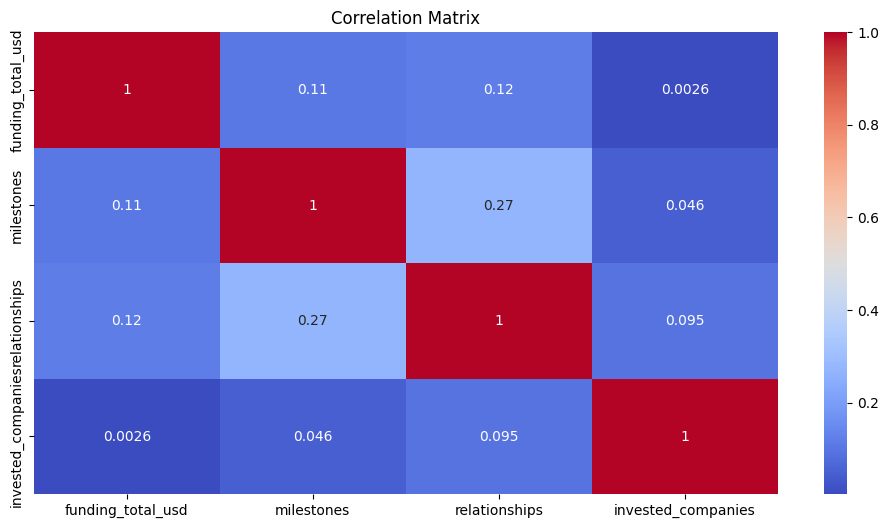

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


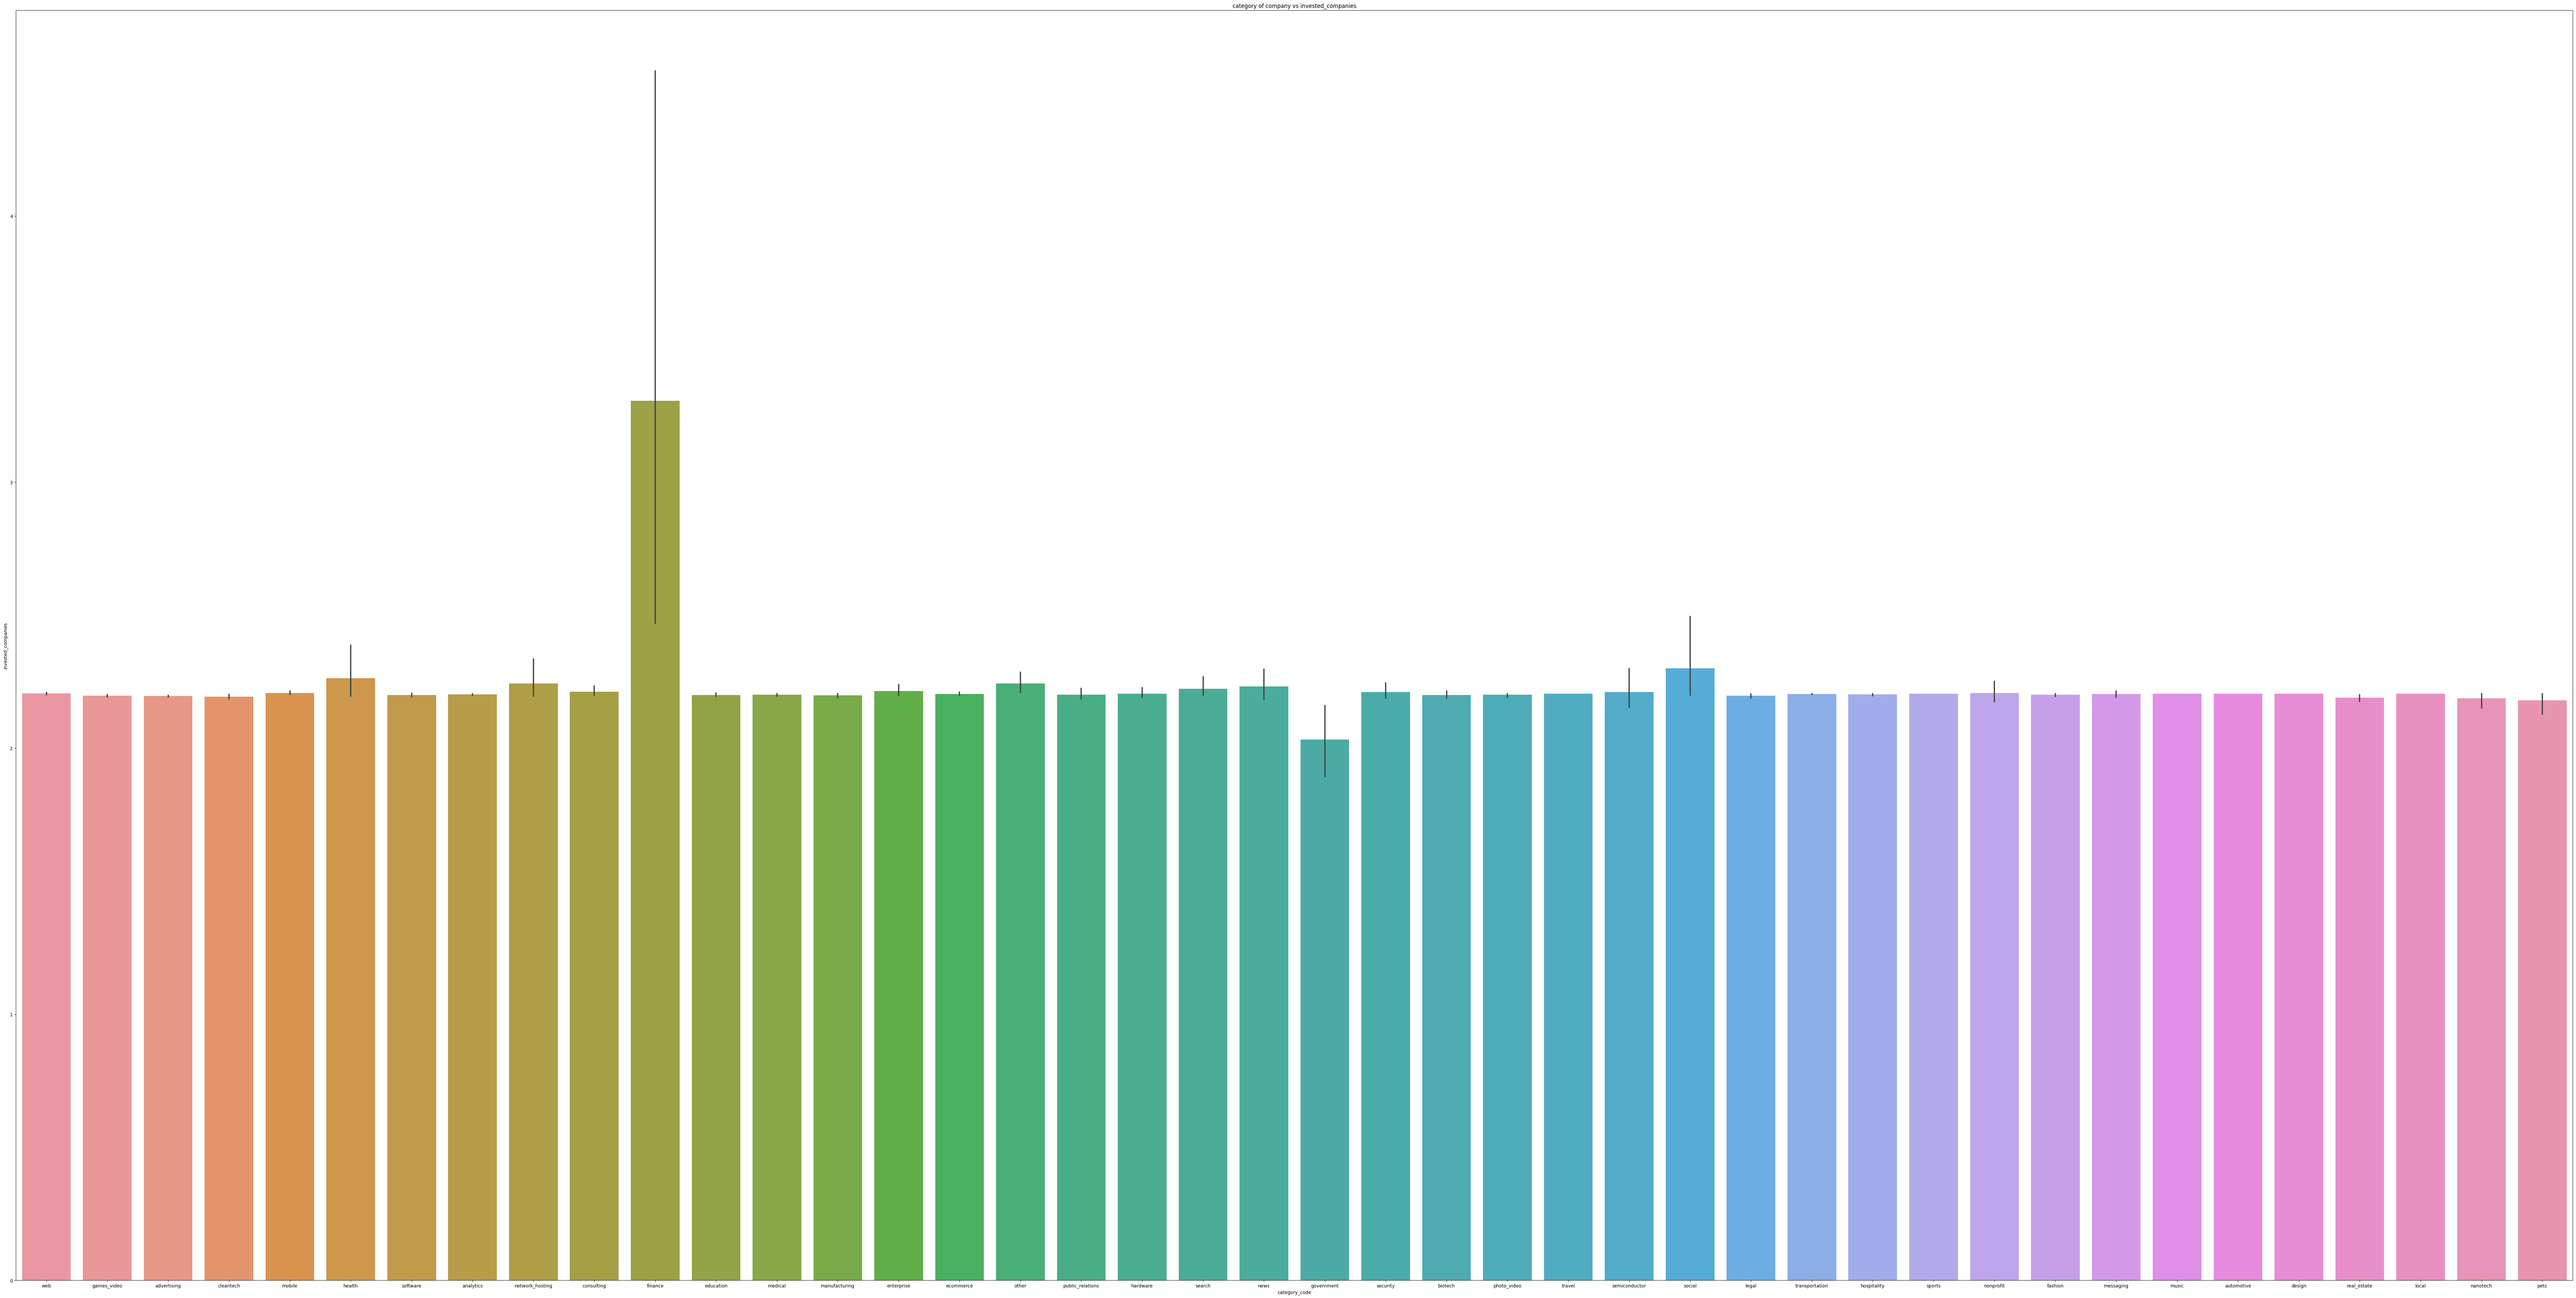

In [20]:
#plotting a bar chart
plt.figure(figsize=(100, 50))
sns.barplot(data=data, x='category_code',y='invested_companies')
plt.title('category of company vs invested_companies')
plt.xlabel('category_code')
plt.ylabel('invested_companies')
plt.show()


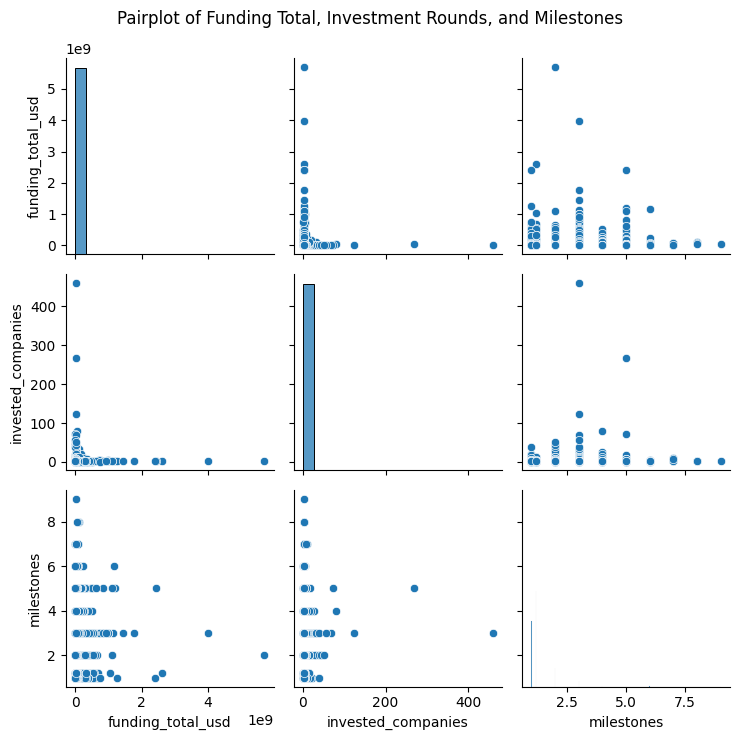

In [21]:
#pairplots
cols_for_pairplot = ['funding_total_usd', 'invested_companies', 'milestones']
sns.pairplot(data[cols_for_pairplot])
plt.suptitle('Pairplot of Funding Total, Investment Rounds, and Milestones')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'invested_companies')

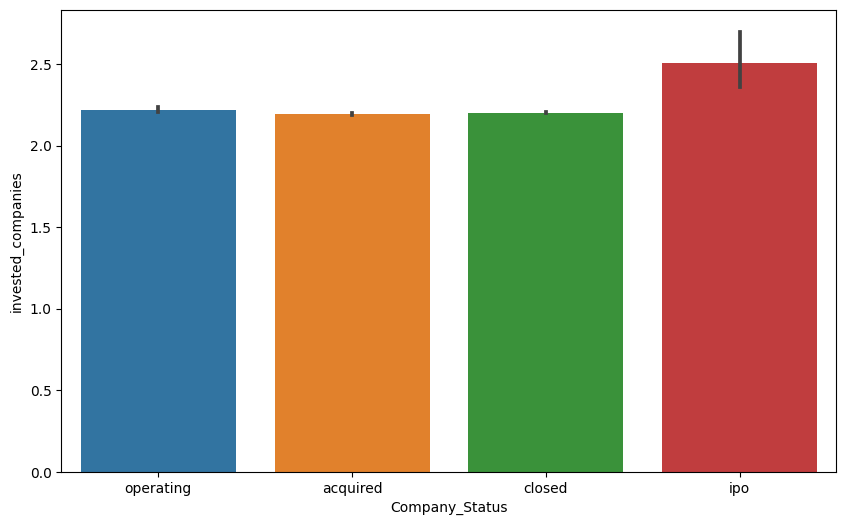

In [22]:
#barplot between Company_Status vs invested_companies
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='status',y='invested_companies')
plt.xlabel("Company_Status")
plt.ylabel("invested_companies")


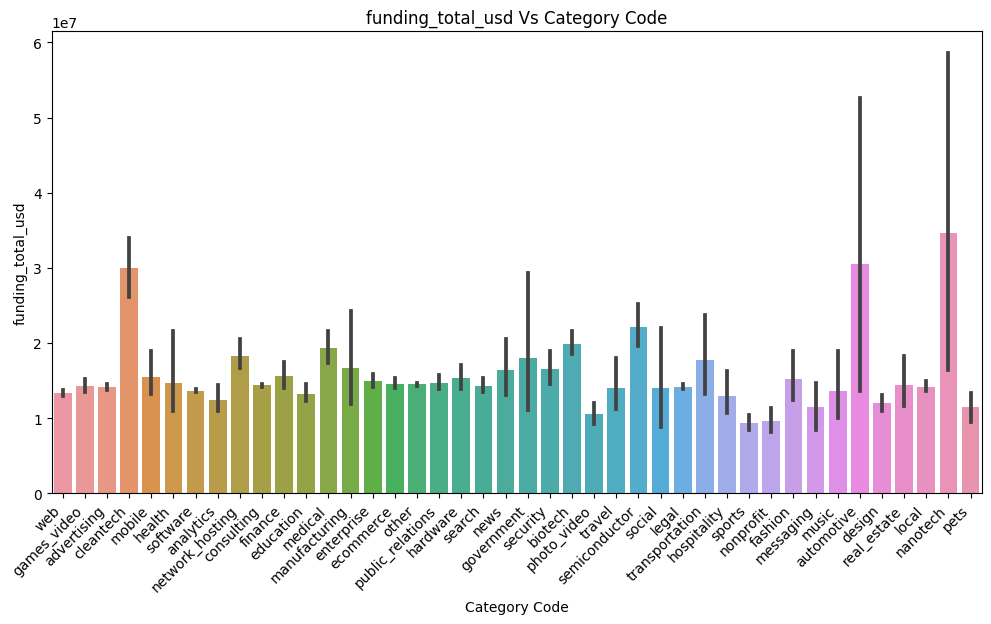

In [23]:
#plotting barplot funding_total_usd Vs Category Code
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='category_code', y='funding_total_usd')
plt.xlabel('Category Code')
plt.ylabel('funding_total_usd')
plt.xticks(rotation=45, ha='right')
plt.title('funding_total_usd Vs Category Code')
plt.show()


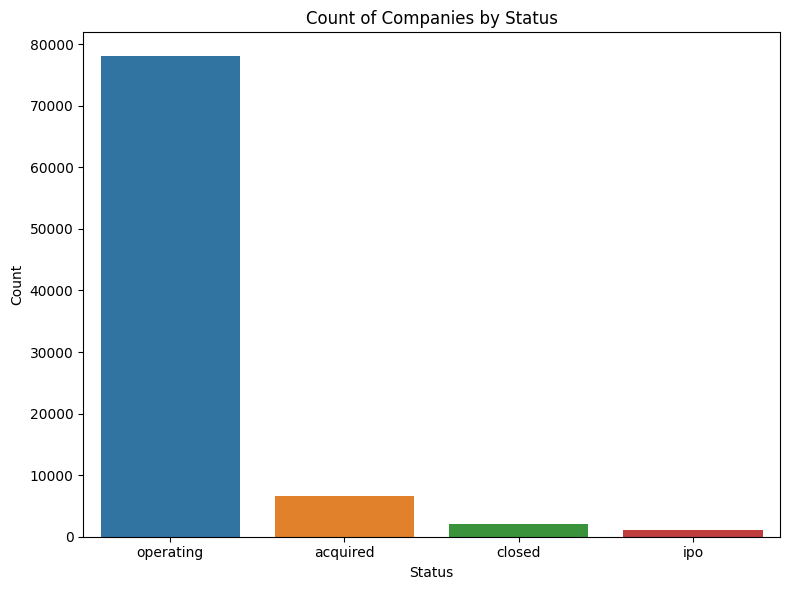

In [24]:
#count plot of companies by status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Companies by Status')
plt.tight_layout()
plt.show()


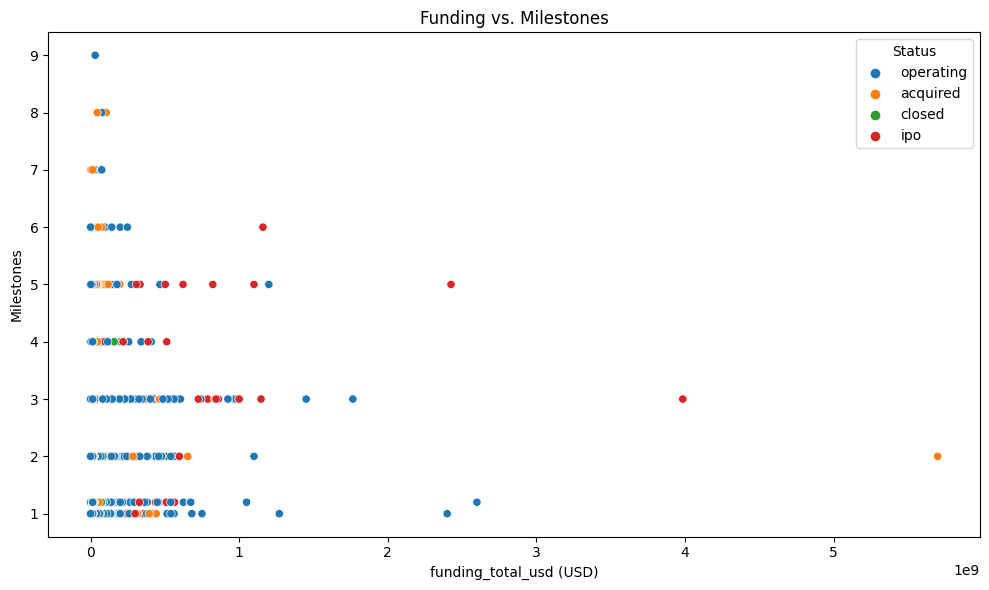

In [25]:
#scatterplot Funding vs. Milestones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='funding_total_usd', y='milestones', hue='status')
plt.xlabel('funding_total_usd (USD)')
plt.ylabel('Milestones')
plt.title('Funding vs. Milestones')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


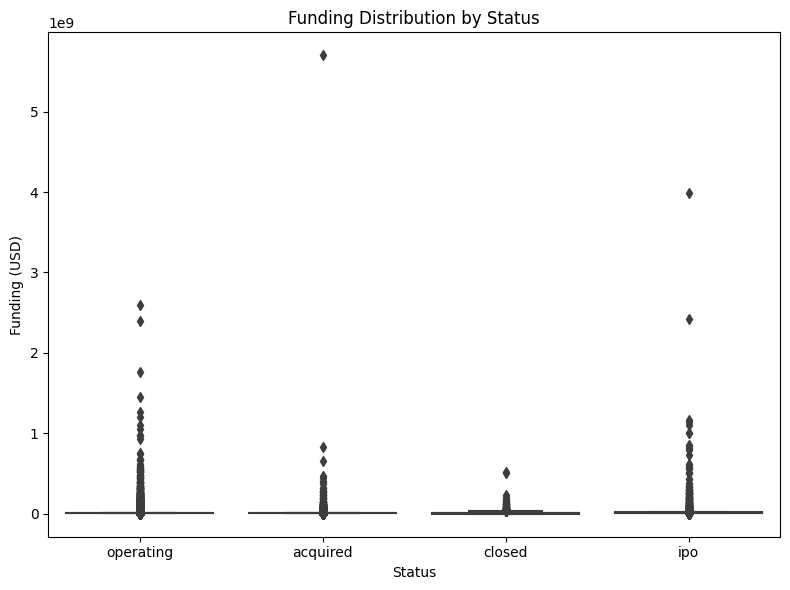

In [26]:
# boxplot Funding Distribution by Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='status', y='funding_total_usd')
plt.xlabel('Status')
plt.ylabel('Funding (USD)')
plt.title('Funding Distribution by Status')
plt.tight_layout()
plt.show()


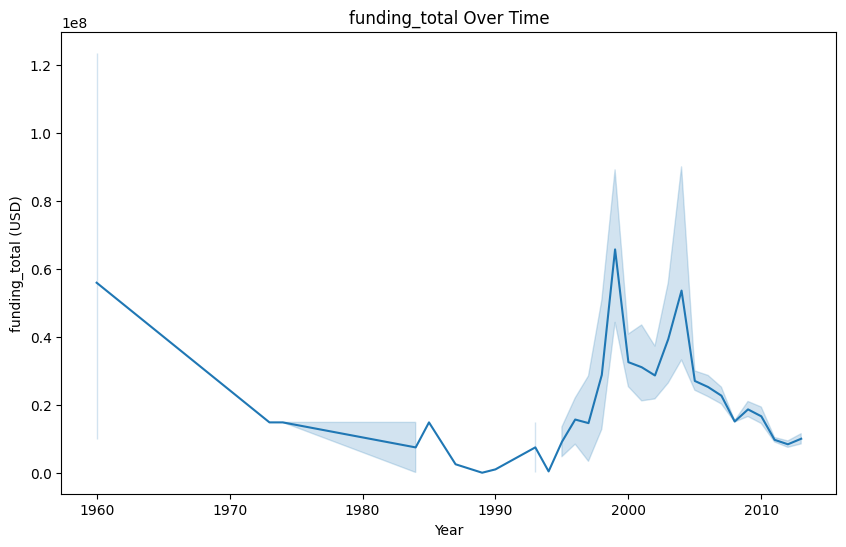

In [27]:
#plotting lineplot funding_total Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='first_funding_at', y='funding_total_usd')
plt.xlabel('Year')
plt.ylabel('funding_total (USD)')
plt.title('funding_total Over Time')
plt.show()


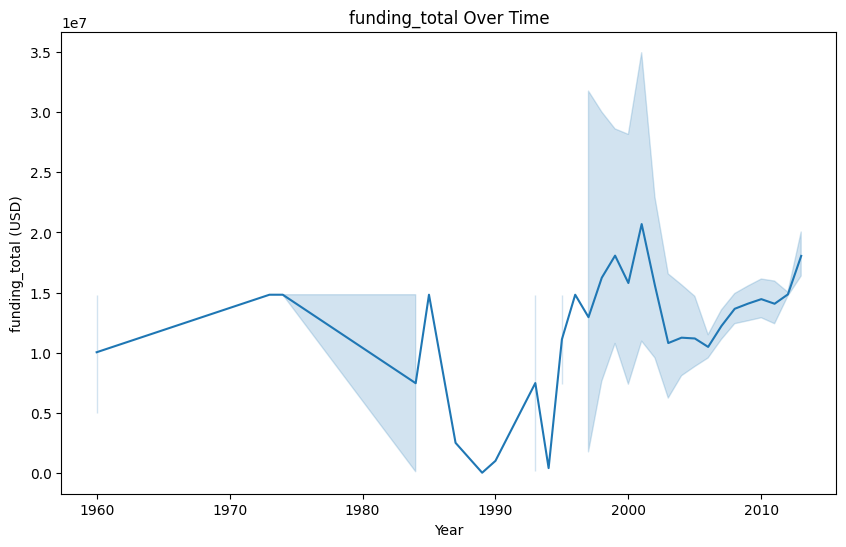

In [28]:
#plotting lineplot funding_total Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='last_funding_at', y='funding_total_usd')
plt.xlabel('Year')
plt.ylabel('funding_total (USD)')
plt.title('funding_total Over Time')
plt.show()


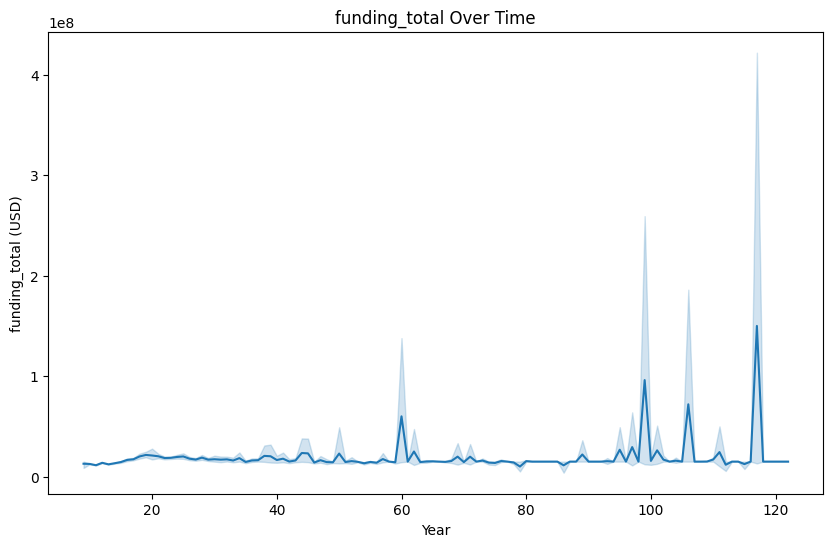

In [29]:
#plotting funding vs comapny age
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='company_age', y='funding_total_usd')
plt.xlabel('Year')
plt.ylabel('funding_total (USD)')
plt.title('funding_total Over Time')
plt.show()
